In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Closed Form Derivation

$$ \hat y = h(\theta.x) = {\theta}^{T}.X $$


$ \hat y $= prediction
h is hypothesis function
\theta are feature weights
and X is array of features


To train we need to reduce y-$ \hat y $ (our cost function). We go for RMSE as the metric for evaluation, but while training since our regression formulation is convex, what minimizes RMSE will minimise MSE.

MSE = 

$$ MSE = \frac{1}{2m}(y-\hat y)^{T}(y-\hat y) $$
$$ MSE = \frac{1}{2m}(X{\theta}-y)^{T}(X{\theta}-y) $$
$$ MSE = \frac{1}{2m}((X\theta )^{T}-y^{T})(X{\theta}-y) $$


$$ MSE = \frac{1}{2m}( \theta^{T}X^{T}-y^{T})(X{\theta}-y) $$
$$ MSE = \frac{1}{2m}( \theta^{T}X^{T}X{\theta}-\theta^{T}X^{T}y-y^{T}X{\theta}+y^{T}y) $$
$$ MSE = \frac{1}{2m}( \theta^{T}X^{T}X{\theta}-\theta^{T}X^{T}y-\theta^{T}X^{T}y+y^{T}y) $$
$$ MSE = \frac{1}{2m}( \theta^{T}X^{T}X{\theta}-2\theta^{T}X^{T}y+y^{T}y) $$

We need to minimize MSE. Our variable is $\theta$. Visualize the above equation as simple multiplication of \theta rather than matrix multiplication. $\theta^{T}\theta$ is basically $\sum {\theta}^2$. Thus, deriving MSE w.r.t. $\theta$ gives:
$$ \frac{\delta MSE}{\delta \theta} = 0 $$
 $$ \frac{1}{2m}(2X^{T}X{\theta}-2X^{T}y)=0$$ 

 $$ {\theta} = (X^{T}X)^{-1}X^{T}y$$ 

In [18]:
# Implementation of normal equation
def theta_using_normal_equation(X,y):
    theta = np.linalg.inv(X.T@X)@(X.T)@y
    return theta

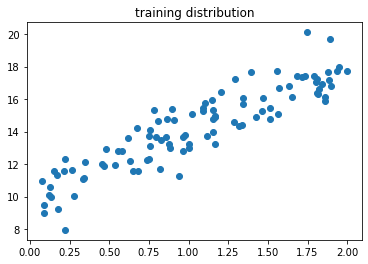

Text(0.5, 1.0, 'data superimposed with the regressed line')

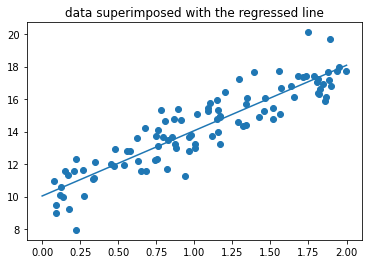

In [15]:
# Generate some noisy data

X1 = 2*np.random.rand(100,1)
y = 10+4*X1+np.random.randn(100,1)

# visualize
plt.scatter(X1,y);
plt.title('training distribution')
plt.show() 


# Add intercept to X
X = np.c_[np.ones((100,1)),X1]
theta = theta_using_normal_equation(X,y)

Xtest = np.array([[0],[2]])
Xtestt = np.c_[np.ones((2,1)),Xtest]
ytest = Xtestt@theta

plt.plot(Xtest,ytest)
plt.scatter(X1,y)
plt.title('data superimposed with the regressed line')

We created data for $y = 10+4x+Noise$ The presence of Gaussian noise made it impossible for normal equation to get the exact coefficients. This noise leads to irreducible error.

## Singularity 

Normal equation calculates inverse of X, which may be singular if number of features > number of independent observations or we have redundant features. Let test this. 

(NOTE: If we use ridge regularization, it makes sure the matrix is always non singular by adding $ \lambda $ ( l2 regularization coefficient) at every diagonal element in the matrix 

### TODO: Add reference



### Case 1: Dependent Features 

In [23]:
## We add a new feature which is 2X 
X2 = 2*X1 #+np.random.randn(100,1)

X3 = np.c_[np.ones((100,1)),X1,X2]
theta = theta_using_normal_equation(X3,y)

### This should give error singular matrix! Dont know why it isnt, it gave earlier. 

Indeed we get a singular matrix (ref. https://stats.stackexchange.com/questions/70899/what-correlation-makes-a-matrix-singular-and-what-are-implications-of-singularit#:~:text=A%20square%20matrix%20is%20singular,being%20without%20a%20constant%20term. for description on what all can cause this)
If columns are linearly dependent the matrix goes singular. (Multicollinearity?)
To circumvent this, we can use pseudo inverse (which used SVD) as shown below. Pinverse will give a solution. For a proof ref. https://orinanobworld.blogspot.com/2015/10/ols-oddities.html

In [13]:
## TODO: Code isnt right post this 

def p_inverse(X, y):
    thetaa = np.linalg.pinv(X.T@X)@(X.T)@y
    return thetaa

#test prediction
Xtest = np.array([[0],[2]])
Xtest = np.c_[Xtest,2*np.array([[0],[2]])]
Xtestt = np.c_[np.ones((2,1)),Xtest]
thetaa = p_inverse(Xtestt
ytest = Xtestt@thetaa

plt.plot(Xtest,ytest)
plt.scatter(X1,y)

SyntaxError: invalid syntax (<ipython-input-13-643a2046fe13>, line 12)

In [5]:
Xtest.shape

NameError: name 'Xtest' is not defined

What if the features arent redundant. There is some random noise in the second feature

In [17]:
X2 = 2*X1+np.random.randn(100,1)
X3 = np.c_[np.ones((100,1)),X1,X2]
theta = normal_equation(X3,y)
theta

array([[10.23806886],
       [ 3.68466937],
       [ 0.09941189]])

Normal equation gave no weightage to that. 

In [18]:
X2 = 2*X1+1
X3 = np.c_[np.ones((100,1)),X1,X2]
theta = normal_equation(X3,y)
theta

array([[ 3.93878813],
       [-1.9153472 ],
       [ 3.0408183 ]])